### Machine Learning, Prof. Orachat's Summer Course

In [3]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
# import dataset
columns = ['user','activity','timestamp','x-axis','y-axis','z-axis']
df = pd.read_csv('dataset/WISDM_ar_v1.1_raw.txt', header=None, names=columns)
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098204 entries, 0 to 1098203
Data columns (total 6 columns):
user         1098204 non-null int64
activity     1098204 non-null object
timestamp    1098204 non-null int64
x-axis       1098204 non-null float64
y-axis       1098204 non-null float64
z-axis       1098203 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [8]:
df.isna()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


### Exercise

In [9]:
def process_moving_average(activity, df, time_window, filter_window):
    
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:time_window]
    Filter_window = filter_window
    data_rolling_mean = data.rolling(Filter_window).mean()
    #Fill missing first rows
    fill_number = Filter_window-1
    fill_data = data[:fill_number]
    data_rolling_mean.update(fill_data)
    #Combine raw data and moving AVG
    df_01 = data
    df_01["ma_x"] = data_rolling_mean["x-axis"]
    df_01["ma_y"] = data_rolling_mean["y-axis"]
    df_01["ma_z"] = data_rolling_mean["z-axis"]
    #Plotting
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(16, 12))
    ax[0].set_title(activity)
    ax[0].plot(df_01[["x-axis"]], label='x-axis',color="b")
    ax[0].plot(df_01[["ma_x"]], label='ma_x',color="red")
    ax[0].legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    
    ax[1].plot(df_01[["y-axis"]], label='y-axis',color="orange")
    ax[1].plot(df_01[["ma_y"]], label='ma_y',color="red")
    ax[1].legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    
    ax[2].plot(df_01[["z-axis"]], label='z-axis',color="g")
    ax[2].plot(df_01[["ma_z"]], label='ma_z',color="red")
    ax[2].legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    return df_01


,x-axis,y-axis,z-axis,ma_x,ma_y,ma_z
0,-0.694638,12.680544,0.503953,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164,-1.184970,12.108489,7.205164
5,1.375655,-2.492524,-6.510526,1.375655,-2.492524,-6.510526
6,-0.612916,10.569390,5.706926,-0.612916,10.569390,5.706926
7,-0.503953,13.947236,7.055340,-0.503953,13.947236,7.055340
8,-8.430995,11.413852,5.134871,-8.430995,11.413852,5.134871
9,0.953424,1.375655,1.648062,0.953424,1.375655,1.648062


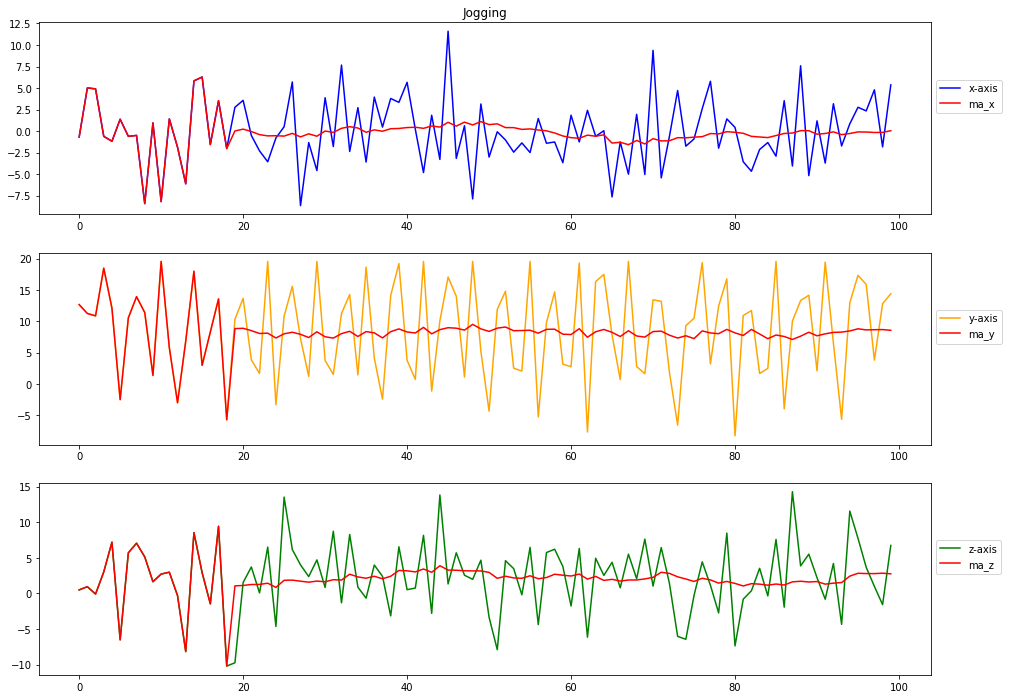

In [11]:
process_moving_average('Jogging', df, 100, 20)